In [3]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tqdm import tqdm

In [2]:
file = "../data/SSCURVES(1-61).xlsx"
xls = pd.ExcelFile(file)

100%|███████████████████████████████████████████████████████████████| 63/63 [00:04<00:00, 15.03it/s]


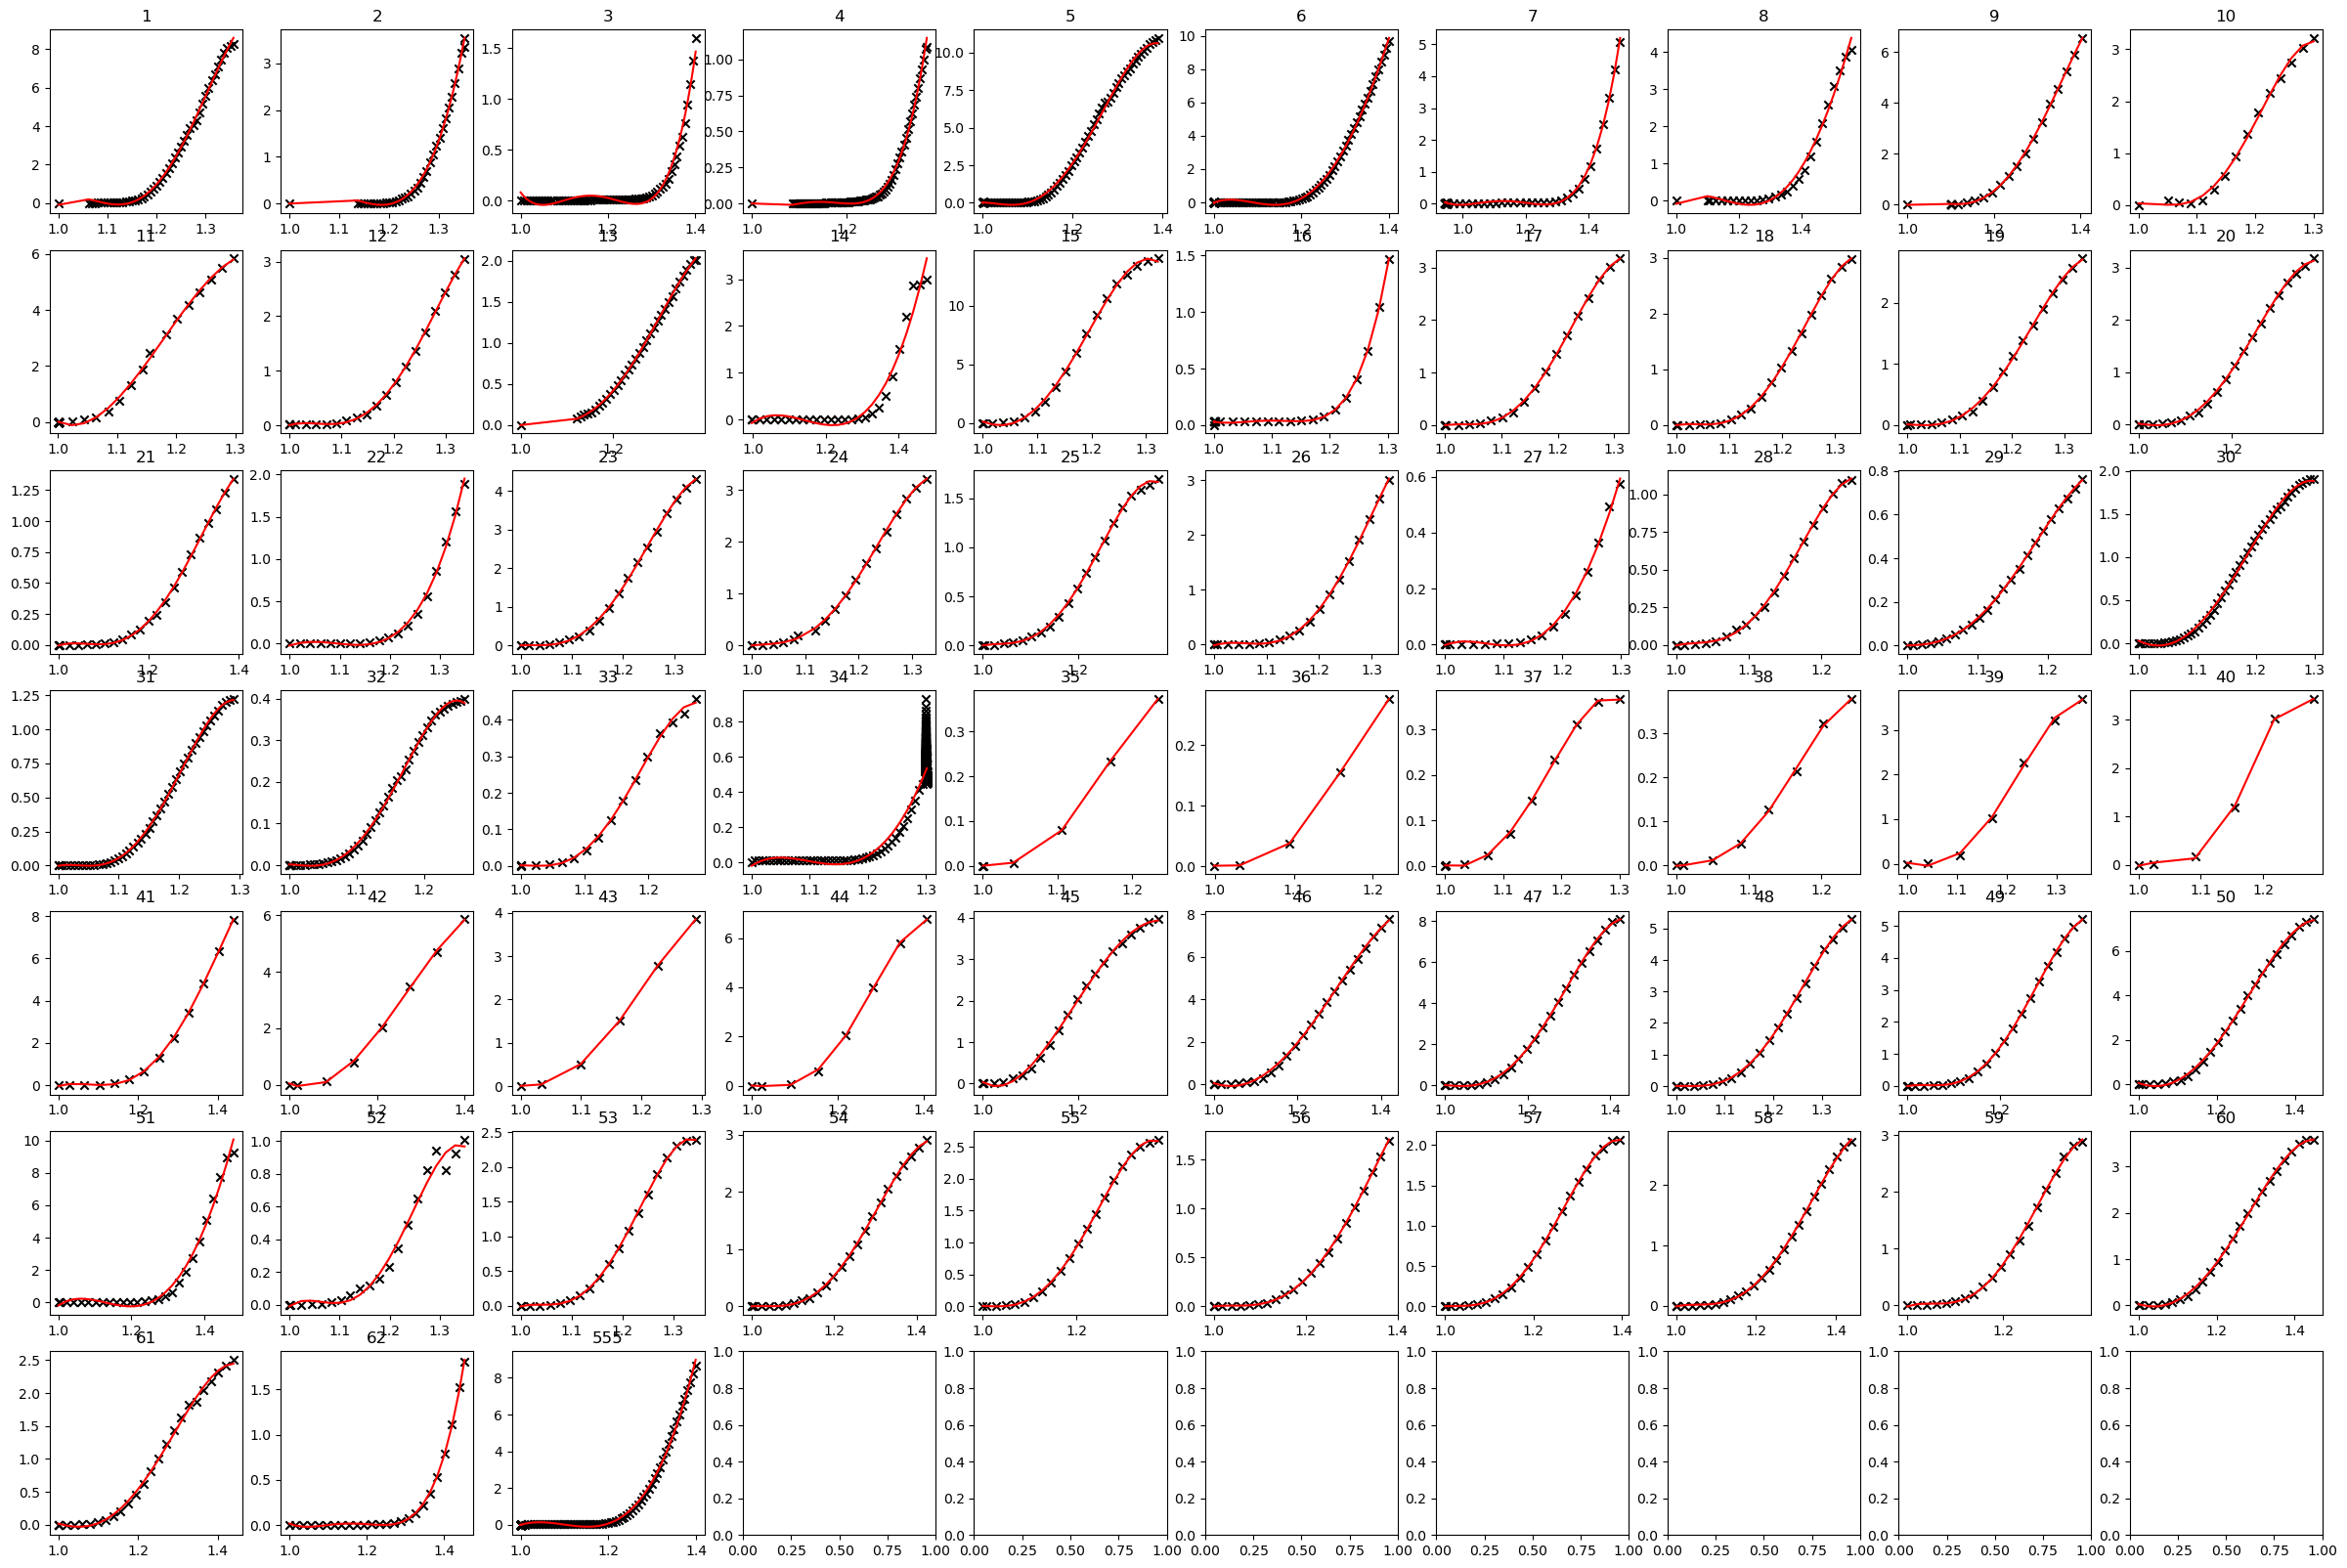

In [6]:


fig, axs = plt.subplots(7, 10, figsize=(30,20))
x = np.linspace(0, 2.5, 1000)


for sheet, ax in tqdm(zip(xls.sheet_names, axs.flat), total=len(xls.sheet_names), ncols=100):
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.dropna(subset=['Strain', 'Stress'])

    x_data = df['Strain']
    y_data = df['Stress']

    z = np.polyfit(x_data, y_data, 4)
    p = np.poly1d(z)

    ax.set_title(sheet)
    ax.scatter(x_data, y_data, marker='x', color='black')
    ax.plot(x_data, p(x_data), 'r-')

plt.show()
